In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Checking if the data is imbalanced**

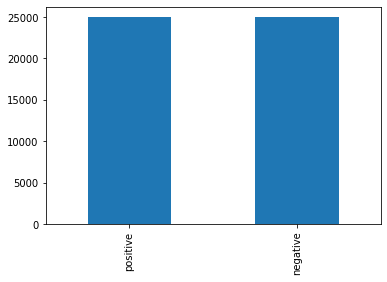

In [3]:
df['sentiment'].value_counts().plot(kind='bar')

In [4]:
df['review_processed'] = df.review.str.replace("[^a-zA-z0-9]"," ")

<ipython-input-4-9143d5da015a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df.review.str.replace("[^a-zA-z0-9]"," ")


In [5]:
# Ordering the DataFrame
df = df[['review','review_processed','sentiment']]

In [6]:
df['review_processed']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production   br    br   The...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s  Love in the Time of Money  is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot  bad dialogue  bad acting  idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review_processed, Length: 50000, dtype: object

### Deleting the words who's length is less than 2

In [7]:
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [8]:
df['review_processed'] = [row.lower() for row in df['review_processed']]

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stopwords = stopwords.words('english')
add_words = ['movie','film','one','make','even','see','movies','get','makes',
             'making','time','watch','character','good','like','well','would']
stopwords.extend(add_words)

### Removing stopswords

In [11]:
def remove_stopwords(rev):
  review_tokenize = word_tokenize(rev)
  rev_new = ' '.join(i for i in review_tokenize if i not in stopwords)
  return rev_new

df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

In [12]:
df['review_processed']

0        reviewers mentioned watching episode hooked ri...
1        wonderful little production filming technique ...
2        thought wonderful way spend hot summer weekend...
3        basically family little boy jake thinks zombie...
4        petter mattei love money visually stunning mat...
                               ...                        
49995    thought right job creative original first expe...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin se...
49999    expects star trek high art fans expect best ep...
Name: review_processed, Length: 50000, dtype: object

In [13]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  if nltk_tag.startswith('V'):
    return wordnet.VERB
  if nltk_tag.startswith('N'):
    return wordnet.NOUN
  if nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None


def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  word_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
  lemmatized_sentence = []
  for word, tag in word_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return ' '.join(lemmatized_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
df['review_processed'] = df['review_processed'].apply(lambda x : lemmatize_sentence(x))
df['review_processed']

0        reviewer mention watch episode hook right exac...
1        wonderful little production film technique una...
2        think wonderful way spend hot summer weekend s...
3        basically family little boy jake think zombie ...
4        petter mattei love money visually stun mattei ...
                               ...                        
49995    think right job creative original first expect...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    go disagree previous comment side maltin secon...
49999    expect star trek high art fan expect best epis...
Name: review_processed, Length: 50000, dtype: object

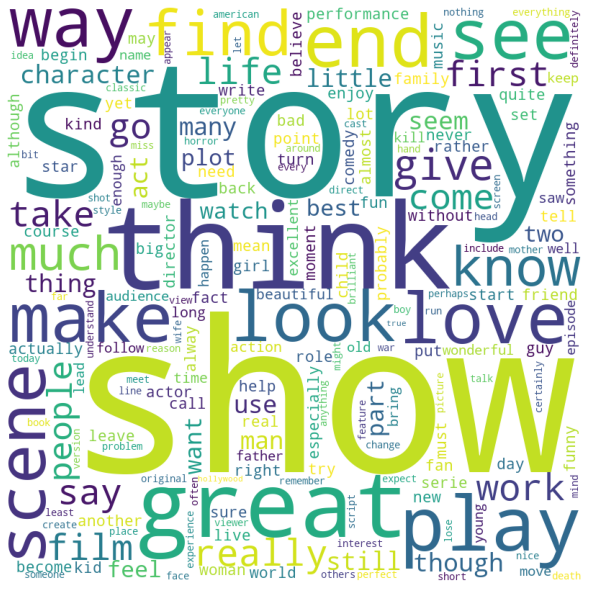

In [15]:
# Mostly repeated words in positive reviews 
from wordcloud import WordCloud

wc = df.loc[df['sentiment'] == 'positive']
aw = ' '.join([i for i in wc['review_processed']])

wcd = WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(aw)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wcd)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

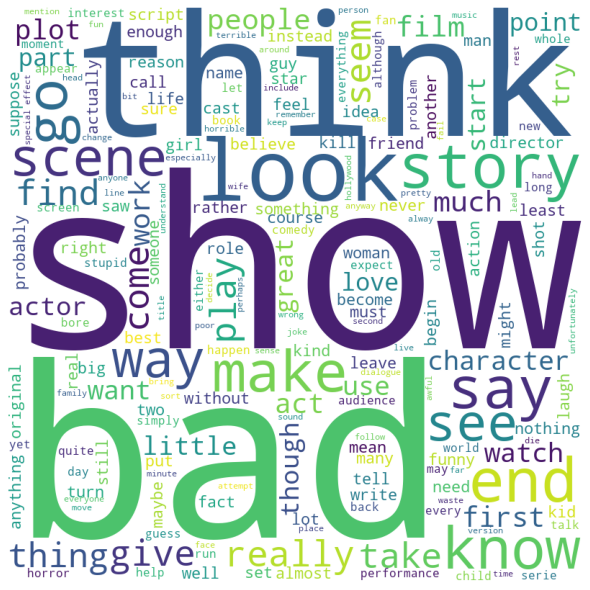

In [16]:
# Mostly repeated words in negative reviews 
from wordcloud import WordCloud

wc = df.loc[df['sentiment'] == 'negative']
aw = ' '.join([i for i in wc['review_processed']])

wcd = WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(aw)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wcd)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
# encoding the categorical data - label encoding
df['sentiment'] = df['sentiment'].map({'positive':1,'negative':0})

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2500)
x = tfidf.fit_transform(df['review_processed']).toarray()
y = df['sentiment']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Model Building

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### Evaluation Metrics

In [21]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

print("Training Accuracy :", model.score(X_train,y_train))
print("Testing Accuracy :", model.score(X_test,y_test))
print("Cross Validation Score :", np.mean(cross_val_score(model,X_train,y_train,cv=10)))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC Score :", roc_auc_score(y_test,y_pred))
print("Confusion Matrix :")
print(confusion_matrix(y_test,y_pred))

Training Accuracy : 0.820175
Testing Accuracy : 0.8081
Cross Validation Score : 0.804975
F1 Score : 0.8094528845199085
ROC Score : 0.8080870428659277
Confusion Matrix :
[[4005  964]
 [ 955 4076]]


In [22]:
pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})

,Actual,Predicted
10644,1,1
18493,1,1
34593,0,0
20643,0,0
49750,1,1
...,...,...
38800,1,0
22693,0,0
37011,0,0
34446,1,1
